<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLSFUN/SVM_REGRESION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARBOLES DE REGRESION**

In [ ]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
import multiprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.anova import anova_lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ------------------------------------------------------------------------------
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pyreadstat
import pyreadstat
Base = pd.read_spss("BASE SATISFACCIÓN.sav")
Base

,enc,p5_1,p5_2,p5_3,p5_4,p5_5,p5_6,p5_7,p5_8,p5_9,p5_10,p5_11,p7_1,p7_2,p7_3,p7_4,p7_5,p7_6,p7_7,p8
0,1.0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,7.0,7.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,8.0
1,2.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,4.0,10.0,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,9657.0,8.0,7.0,7.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0,8.0
4227,9658.0,9.0,9.0,9.0,10.0,9.0,8.0,9.0,8.0,8.0,8.0,9.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0
4228,9659.0,8.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,8.0,9.0,9.0,8.0
4229,9660.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [ ]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   enc     4231 non-null   float64
 1   p5_1    4231 non-null   float64
 2   p5_2    4231 non-null   float64
 3   p5_3    4231 non-null   float64
 4   p5_4    4231 non-null   float64
 5   p5_5    4231 non-null   float64
 6   p5_6    4231 non-null   float64
 7   p5_7    4231 non-null   float64
 8   p5_8    4231 non-null   float64
 9   p5_9    4231 non-null   float64
 10  p5_10   4231 non-null   float64
 11  p5_11   4231 non-null   float64
 12  p7_1    4231 non-null   float64
 13  p7_2    4231 non-null   float64
 14  p7_3    4231 non-null   float64
 15  p7_4    4231 non-null   float64
 16  p7_5    4231 non-null   float64
 17  p7_6    4231 non-null   float64
 18  p7_7    4231 non-null   float64
 19  p8      4231 non-null   float64
dtypes: float64(20)
memory usage: 661.2 KB


In [ ]:
Base.isnull().sum()

enc      0
p5_1     0
p5_2     0
p5_3     0
p5_4     0
p5_5     0
p5_6     0
p5_7     0
p5_8     0
p5_9     0
p5_10    0
p5_11    0
p7_1     0
p7_2     0
p7_3     0
p7_4     0
p7_5     0
p7_6     0
p7_7     0
p8       0
dtype: int64

In [ ]:
X = pd.DataFrame(Base,columns = ("p5_1","p5_2","p5_3","p5_4","p5_5","p5_6","p5_7","p5_8","p5_9","p5_10","p5_11",
"p7_1","p7_2","p7_3","p7_4","p7_5","p7_6","p7_7"))
X

,p5_1,p5_2,p5_3,p5_4,p5_5,p5_6,p5_7,p5_8,p5_9,p5_10,p5_11,p7_1,p7_2,p7_3,p7_4,p7_5,p7_6,p7_7
0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,7.0,8.0,7.0,7.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0
1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,5.0,10.0,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,8.0,7.0,7.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0
4227,9.0,9.0,9.0,10.0,9.0,8.0,9.0,8.0,8.0,8.0,9.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0
4228,8.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0,9.0,8.0,8.0,9.0,9.0,9.0,8.0,8.0,9.0,9.0
4229,8.0,8.0,8.0,7.0,7.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = X.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
189,p5_11,p5_10,0.882825,0.882825
172,p5_10,p5_11,0.882825,0.882825
39,p5_3,p5_4,0.825434,0.825434
56,p5_4,p5_3,0.825434,0.825434
96,p5_6,p5_7,0.821635,0.821635
113,p5_7,p5_6,0.821635,0.821635
153,p5_9,p5_10,0.820075,0.820075
170,p5_10,p5_9,0.820075,0.820075
303,p7_6,p7_5,0.816483,0.816483
286,p7_5,p7_6,0.816483,0.816483


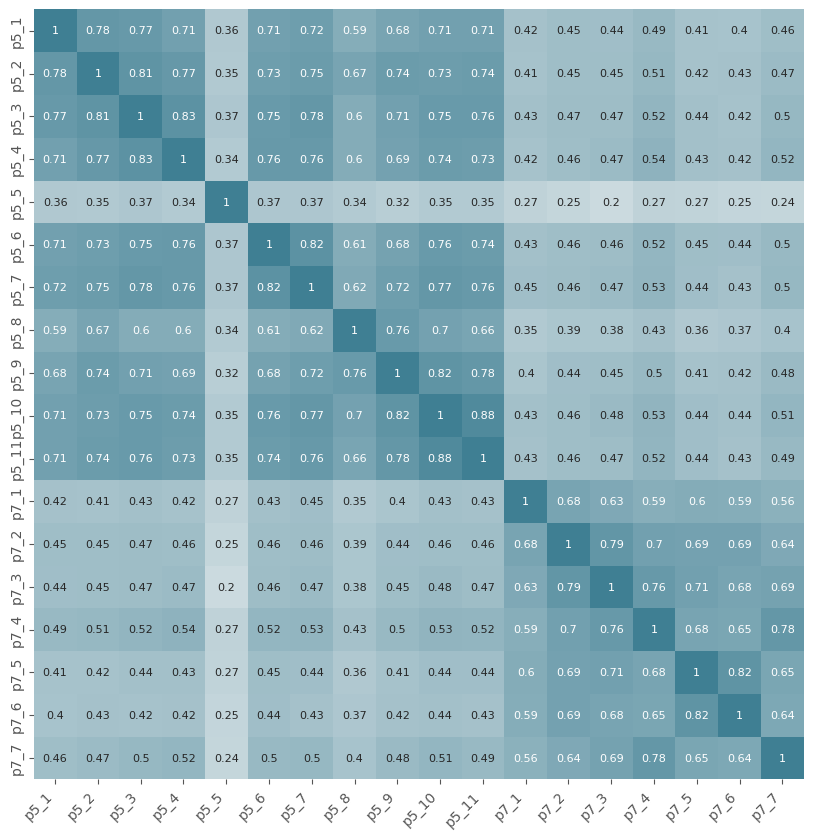

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Base['p8'],
                                        train_size = 0.8,
                                        random_state = 123
                                    )


**ARBOL DE DESICIÓN**

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


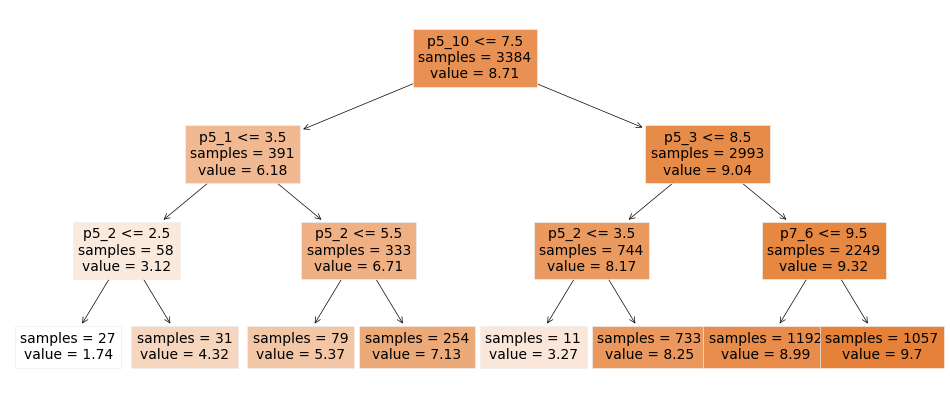

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
Data = pd.DataFrame(Base,columns = ("p5_1","p5_2","p5_3","p5_4","p5_5","p5_6","p5_7","p5_8","p5_9","p5_10","p5_11",
"p7_1","p7_2","p7_3","p7_4","p7_5","p7_6","p7_7","p8"))

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = Data.drop(columns = "p8").columns,
            class_names   = 'p8',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(Data.drop(columns = "p8").columns)
               )
print(texto_modelo)

|--- p5_10 <= 7.50
|   |--- p5_1 <= 3.50
|   |   |--- p5_2 <= 2.50
|   |   |   |--- value: [1.74]
|   |   |--- p5_2 >  2.50
|   |   |   |--- value: [4.32]
|   |--- p5_1 >  3.50
|   |   |--- p5_2 <= 5.50
|   |   |   |--- value: [5.37]
|   |   |--- p5_2 >  5.50
|   |   |   |--- value: [7.13]
|--- p5_10 >  7.50
|   |--- p5_3 <= 8.50
|   |   |--- p5_2 <= 3.50
|   |   |   |--- value: [3.27]
|   |   |--- p5_2 >  3.50
|   |   |   |--- value: [8.25]
|   |--- p5_3 >  8.50
|   |   |--- p7_6 <= 9.50
|   |   |   |--- value: [8.99]
|   |   |--- p7_6 >  9.50
|   |   |   |--- value: [9.70]



In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': Data.drop(columns = "p8").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,p5_10,0.561585
2,p5_3,0.147031
0,p5_1,0.126197
1,p5_2,0.109268
16,p7_6,0.055919
3,p5_4,0.000000
4,p5_5,0.000000
5,p5_6,0.000000
6,p5_7,0.000000
7,p5_8,0.000000


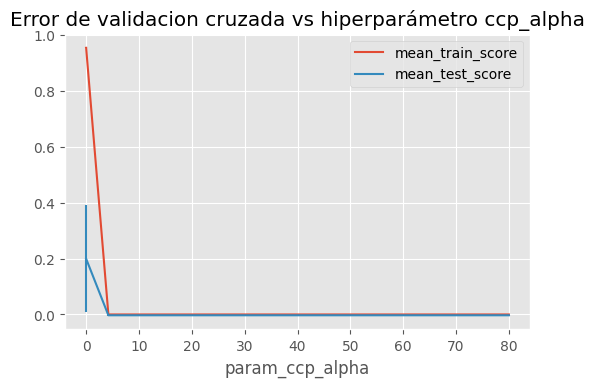

In [ ]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");


In [ ]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

Profundidad del árbol: 32
Número de nodos terminales: 1276


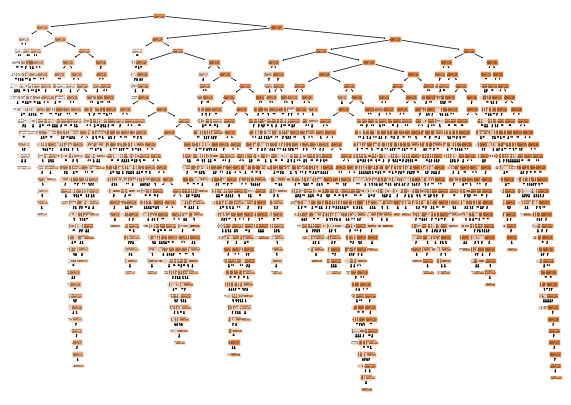

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = Data.drop(columns = "p8").columns,
            class_names   = 'p8',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [ ]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
pred_test_1 = modelo.predict(X = X_test)
error_1 = pred_test_1 - y_test
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred_test_1,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
error_1

El error (rmse) de test es: 1.2729229782886589


901     0.245566
2415   -0.010067
2013   -0.300851
3725    0.245566
3353    0.245566
          ...   
384     0.989933
756     3.245566
3238    1.245566
4180    0.989933
3066    6.125984
Name: p8, Length: 847, dtype: float64

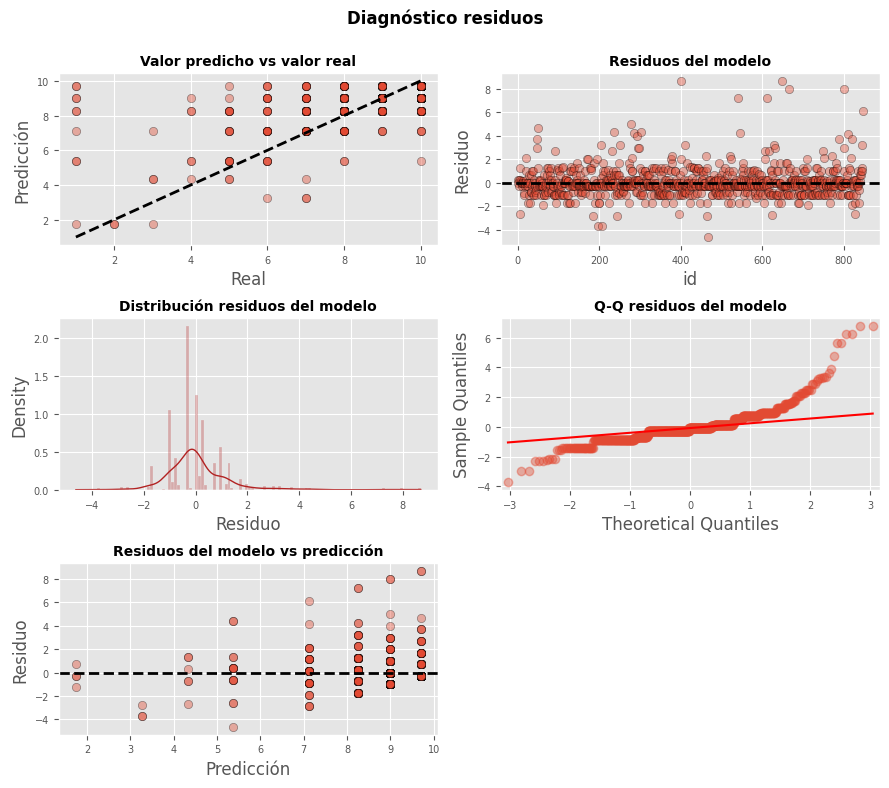

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_test, pred_test_1, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), error_1,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = error_1,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    error_1,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(pred_test_1, error_1,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
pred_test_2 = modelo_final.predict(X = X_test)
error_2 = pred_test_2 - y_test
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred_test_2,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
error_2

El error (rmse) de test es: 1.5592476663073782


901    -1.00
2415    0.00
2013   -0.25
3725    0.20
3353    0.00
        ... 
384     0.00
756     4.00
3238    1.00
4180    1.00
3066    2.00
Name: p8, Length: 847, dtype: float64

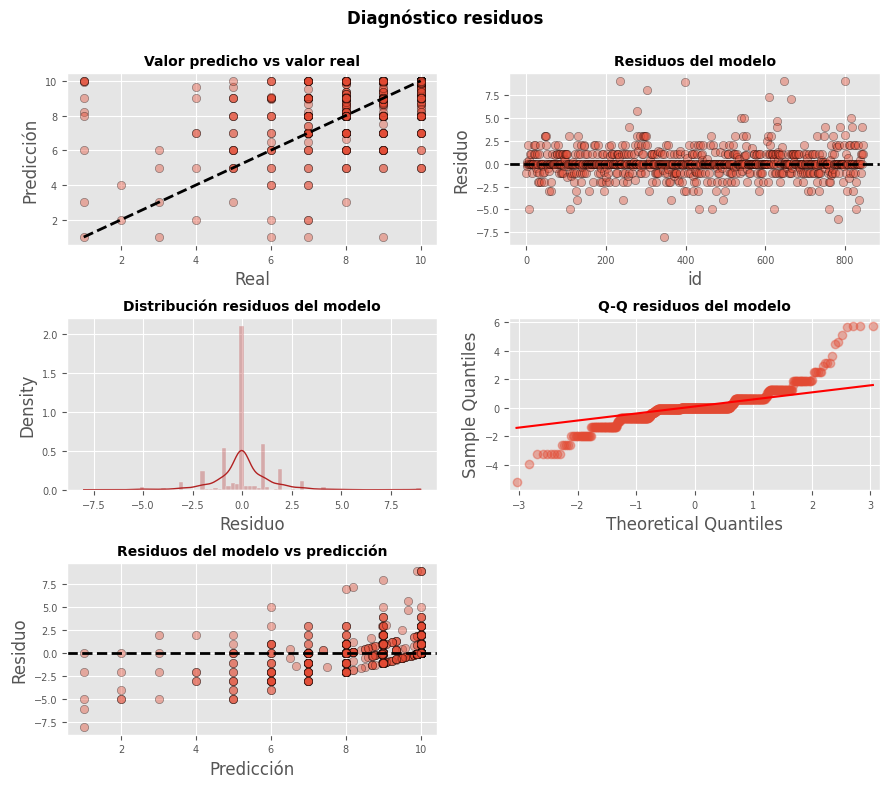

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_test, pred_test_2, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_test))), error_2,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = error_2,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    error_2,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(pred_test_2, error_2,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

**RANDOM FOREST**

In [ ]:
modeloRF = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modeloRF.fit(X_train, y_train)

RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predRF = modeloRF.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predRF,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.1938910299542178


**OPTIMIZACIÓN DE PARÁMETROS**

**NÚMERO DE ARBOLES**

Valor óptimo de n_estimators: 146


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


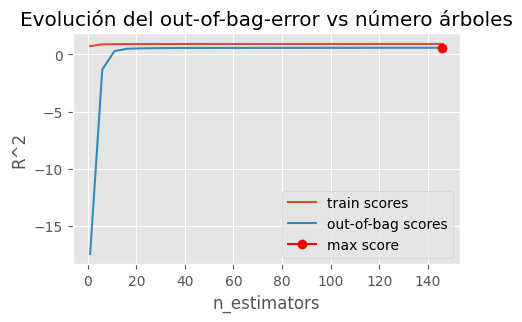

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
warnings.filterwarnings('ignore')
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
warnings.filterwarnings('default')

Valor óptimo de n_estimators: 121


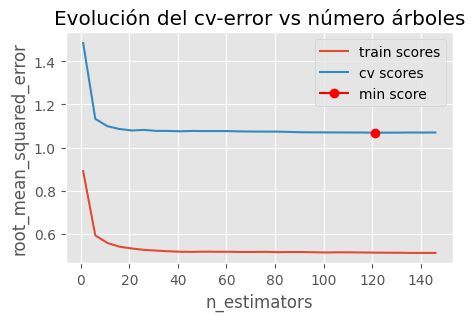

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:

    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

**MAX FEATURES**

Valor óptimo de max_features: 2


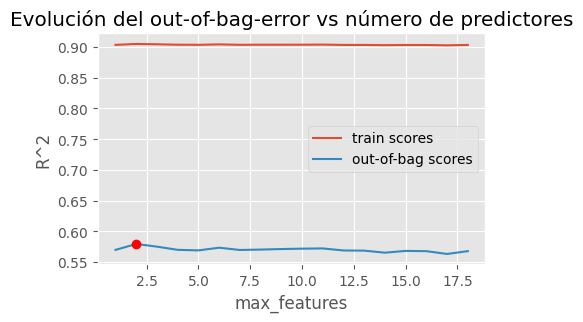

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 2


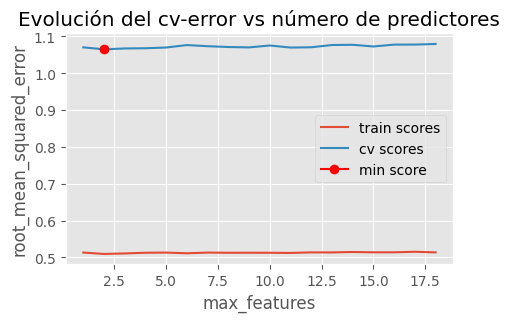

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:

    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

**Grid search**

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:

    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(X_train, y_train)

    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} ✓")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
6,0.596476,10.0,5.0,150.0
7,0.592268,10.0,7.0,150.0
8,0.591258,10.0,9.0,150.0
9,0.583840,20.0,5.0,150.0


In [ ]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0:])

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
oob_r2            0.596476
max_depth        10.000000
max_features      5.000000
n_estimators    150.000000
Name: 6, dtype: float64


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
6,10,5,150,-1.047398,0.066167,-0.718132,0.012842
7,10,7,150,-1.051165,0.065291,-0.709390,0.012813
8,10,9,150,-1.051820,0.066337,-0.703091,0.013040
9,20,5,150,-1.064851,0.067632,-0.518914,0.014203


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 10, 'max_features': 5, 'n_estimators': 150} : -1.0473984702807182 neg_root_mean_squared_error


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.1571496658067426


**Importancia de variables RF**

In [ ]:
DataRF = pd.DataFrame(Base,columns = ("p5_1","p5_2","p5_3","p5_4","p5_5","p5_6","p5_7","p5_8","p5_9","p5_10","p5_11",
"p7_1","p7_2","p7_3","p7_4","p7_5","p7_6","p7_7","p8"))

importancia_predictores = pd.DataFrame({
                            'predictor': DataRF.drop(columns = "p8").columns,
                            'importancia': modelo.feature_importances_
                          })
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,predictor,importancia
1,p5_2,0.157737
9,p5_10,0.099275
6,p5_7,0.091387
10,p5_11,0.089828
0,p5_1,0.080919
8,p5_9,0.079396
2,p5_3,0.072233
3,p5_4,0.050405
16,p7_6,0.034321
11,p7_1,0.032735


**Importancia por permutación**

In [ ]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
1,0.135050,0.004877,p5_2
8,0.121461,0.004187,p5_9
0,0.113986,0.004816,p5_1
9,0.095093,0.005108,p5_10
2,0.092213,0.002520,p5_3
3,0.091848,0.002227,p5_4
6,0.085627,0.002222,p5_7
10,0.084877,0.001506,p5_11
5,0.054670,0.002914,p5_6
16,0.052877,0.001955,p7_6


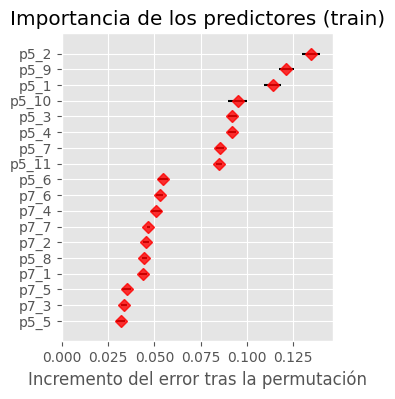

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(3.5, 4))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

**SVM Regresor**

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVR(kernel = 'linear')
modelo.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([ 7.98447882,  9.05874385,  9.23252973,  8.05022912,  8.42070051,
        8.53838874,  6.36210988,  9.07514295,  7.00097812, 10.10005678,
        9.69362983,  8.89235373,  9.0635865 ,  6.4155791 ,  7.50164253,
        9.17207269,  9.5595196 ,  9.88852137,  8.85667378,  8.0919023 ,
        8.98960228,  6.35687468,  9.20778403,  9.53008728,  8.30368113,
       10.04310929,  9.07514295, 10.10243343,  9.06364044,  9.07514295,
        8.05119649,  9.87638912,  8.64405858,  9.11746557,  9.72837508,
       10.10005678,  9.51373499,  9.07514295,  8.33439451,  9.58419434,
        8.76745998,  8.23812038,  9.26622768,  9.58532819,  4.52983477,
        9.06364044, 10.10005678,  9.1545593 ,  9.07514295,  7.89899272,
        8.23820949,  7.67725984, 10.10005678, 10.10005678,  8.12128634,
        6.37618397,  9.06365826,  9.42139234, 10.05770682, 10.0622522 ,
        9.07514295,  7.28438979, 10.10005678,  9.23467732,  9.78425702,
       10.03900236, 10.10005678,  8.12548035,  9.52152555, 10.10

In [ ]:
DataSVR = pd.DataFrame(Base,columns = ("p5_1","p5_2","p5_3","p5_4","p5_5","p5_6","p5_7","p5_8","p5_9","p5_10","p5_11",
"p7_1","p7_2","p7_3","p7_4","p7_5","p7_6","p7_7","p8"))

importancia_predictores = pd.DataFrame({
                            'predictor': DataSVR.drop(columns = "p8").columns,
                            'importancia': modelo.coef_[0]
                          })
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,p5_9,0.156588
6,p5_7,0.134635
0,p5_1,0.132641
3,p5_4,0.089921
1,p5_2,0.085828
10,p5_11,0.081505
2,p5_3,0.071625
17,p7_7,0.060807
12,p7_2,0.056193
7,p5_8,0.055640


In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predSVR = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predSVR,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.1742679478918967


**SVR Gaussiano**

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modeloRBF = SVR(kernel = 'rbf')
modeloRBF.fit(X_train, y_train)

SVR()

In [ ]:
# Predicciones test
# ==============================================================================
prediccionesRBF = modeloRBF.predict(X_test)
prediccionesRBF

array([ 7.87343963,  8.83244946,  9.16667194,  8.09949681,  8.09959323,
        7.95709623,  6.53619615,  9.10018621,  7.2136177 ,  9.90024857,
        9.63637766,  8.88317608,  9.1594625 ,  6.58329711,  7.77972095,
        8.96875274,  9.72267769,  9.60595812,  8.98894686,  7.8296999 ,
        9.27409236,  6.35763524,  9.18050041,  9.89375259,  7.74182789,
        9.87143128,  9.10018621,  9.99318506,  9.12452079,  9.10018621,
        8.11876166,  9.7425606 ,  8.84254845,  9.02380044,  9.73573091,
        9.90024857,  9.61484574,  9.10018621,  7.81575231,  9.38704376,
        8.72721249,  8.68010333,  9.14209013,  9.85774161,  4.39511582,
        9.12452079,  9.90024857,  9.71906744,  9.10018621,  7.12327033,
        8.62333754,  7.16640525,  9.90024857,  9.90024857,  7.95567765,
        6.09955473,  9.14924107,  9.71142627,  9.9278524 , 10.00250704,
        9.10018621,  7.62192764,  9.90024857,  8.92872445,  9.93752257,
        9.96247475,  9.90024857,  8.56187043,  9.52448424,  9.90

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predSVR = modeloRBF.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predSVR,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.1708726918998802
